# Project Report #
## About Dataset ##
I decided to choose the [Titanic data](https://www.udacity.com/api/nodes/5420148578/supplemental_media/titanic-datacsv/download) just out of curiosity.
Data contains the demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. Description of the data can be found [here](https://www.kaggle.com/c/titanic/data)

## Questions  ##
* How the survival of the titanic boat passenger is related to his **sex**, **age**? In general we can assume that Females were given priority over Males in the rescue process.   
* Do other factor **pcalss**(Passenger Class) affect the survival rate ?

## Data Wrangling  ##


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

data_file = 'titanic_data.csv'
# reading data file
titanic = pd.read_csv(data_file)
# Top 5 rows of titanic
print titanic.head(5)
# High level descriptors of the data
titanic.describe()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Missing Data ###
The `describe(titanic)` gives some important information about the data like count, mean, min, max, standard deviation of every column.
Looking into the **Age** columns in output above, we can see that count is `714` and for others it is `891`. So there are missing cells in Age. As **Age** can be an important factor influencing the survival, so we can't ignore it. We should fill some value in all the empty cells of **Age** column. Here , we will put median in emply cells. Pandas `fillna` function can be used in this scenario. 


In [2]:
# Fill empty cells of Age column with median
raw_data_age_median = titanic['Age'].median()
raw_data_age_mean = titanic['Age'].mean()
titanic['Age'] = titanic['Age'].fillna(raw_data_age_median)
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


After filling empty cells, we can see that **Age** column count is now 891.


### Dealing with non numberic data ###
We have many columns with non-numeric data **Name** , **Ticket**, **Cabin** and **Embarked**. We can ignore **Name** , **Ticket**, **Passengerid**, **Fare**  and **Cabin** columns as enough information can't be extracted from these columns. For example **Name** column won't give any information if we don't know which Name corresponds to rich or poor people.   

In [3]:
# First delete column Name, Ticket, Cabin
titanic = titanic.drop('Name', 1)
titanic = titanic.drop('Ticket', 1)
titanic = titanic.drop('Cabin', 1)
titanic = titanic.drop('PassengerId', 1)
titanic = titanic.drop('Fare', 1)


**Sex** column is non-numeric but it is an important column. We can assume that Females were given priority over Males while rescuing. So to validate this hypothesis, we will keep this column. As it is good practice to convert values to numeric data so that we can do mathematical operations, we will convert Embarked column.

Similarly we will convert **Embarked** column. First lets what all unique values are there in **Embarked** column.

In [4]:
print(titanic["Embarked"].unique())

['S' 'C' 'Q' nan]


Now lets see which value is most common in the **Embarked** column.


In [5]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

As 'S' is most common, it is good to assign 'S' to cells with missing values. And then we will do the numeric substitution for all the values. 'S' -> 0, 'C' -> 1, 'Q' -> 2

In [6]:
titanic['Embarked'] = titanic['Embarked'].fillna('S')
titanic.loc[titanic['Embarked'] == 'S', 'Embarked'] = 0
titanic.loc[titanic['Embarked'] == 'C', 'Embarked'] = 1
titanic.loc[titanic['Embarked'] == 'Q', 'Embarked'] = 2

In [7]:
print(titanic["Embarked"].unique())

[0 1 2]


Lets do describe now

In [8]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594
std,0.486592,0.836071,13.019697,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


Even now **Embarked** column is not visible in the describe.
Lets see the dtype of the column value.

In [9]:

print titanic['Embarked'].dtype

object


For describe to work on **Sex** and **Embarked** columns, the dtype should be int.
So now lets convert the dtype using `astype(np.int64)`

In [10]:
titanic['Embarked'] = titanic['Embarked'].astype(np.int64)


Lets do describe again

In [11]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,0.361392
std,0.486592,0.836071,13.019697,1.102743,0.806057,0.635673
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,0.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,2.000000


Now **Sex** and **Embarked** columns are also "described".

## Explore ##
Now lets do some exploration on the data.



### Single Variable Analysis ###
#### Age ####
Lets do some describe and plot the histogram.

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64


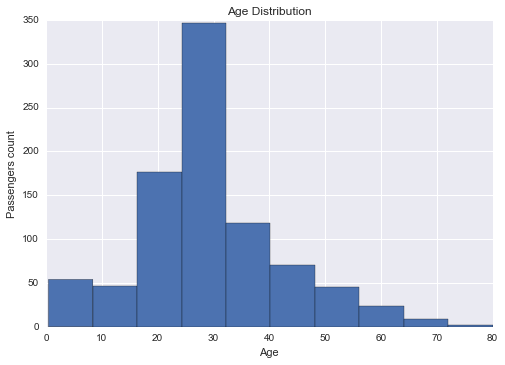

In [12]:
# inline plot
%matplotlib inline
# beautify the plot
import seaborn as sns

print titanic['Age'].describe()
plt.figure()
titanic.hist(column='Age')
plt.xlabel('Age')
plt.ylabel('Passengers count')
plt.title('Age Distribution')
plt.show()

We see a spike at around 30 in our histogram. Lets see which value in Column **Age** is occuring most in the dataset.

In [13]:
titanic['Age'].value_counts()

28.00    202
24.00     30
22.00     27
18.00     26
30.00     25
19.00     25
21.00     24
25.00     23
36.00     22
29.00     20
32.00     18
27.00     18
35.00     18
26.00     18
16.00     17
31.00     17
23.00     15
34.00     15
33.00     15
20.00     15
39.00     14
17.00     13
40.00     13
42.00     13
45.00     12
38.00     11
50.00     10
2.00      10
4.00      10
47.00      9
        ... 
28.50      2
40.50      2
63.00      2
13.00      2
10.00      2
45.50      2
70.00      2
30.50      2
71.00      2
59.00      2
57.00      2
55.00      2
0.75       2
64.00      2
23.50      1
14.50      1
0.67       1
53.00      1
0.92       1
0.42       1
70.50      1
36.50      1
80.00      1
66.00      1
74.00      1
12.00      1
55.50      1
34.50      1
24.50      1
20.50      1
Name: Age, dtype: int64

The most occuring value is `28`.
There were 177 data points missing for column **Age**. We put median(28) in place of those empty cells. So around 20% of the data has been put as median. As it can lead us to misrepresentation into the analysis, we won't do the analysis for the **Age** column.

#### Sex ####
Lets do some describe and draw the histogram

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object


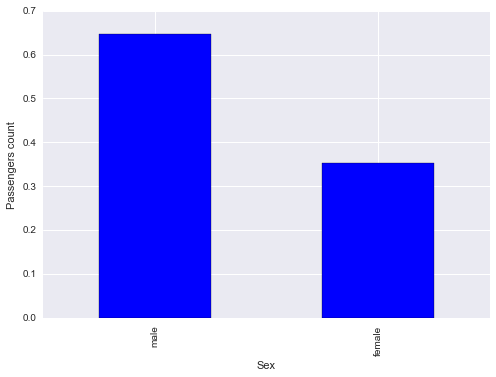

In [26]:
plt.figure()
print titanic['Sex'].describe()
(titanic['Sex'].value_counts()/titanic['Sex'].value_counts().sum()).plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Probability')
plt.show()

Out of all the passengers, around 64.7% of them are male and rest are females.

#### Pclass #####
Lets see some properties of Pclass


count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64
3    491
1    216
2    184
Name: Pclass, dtype: int64


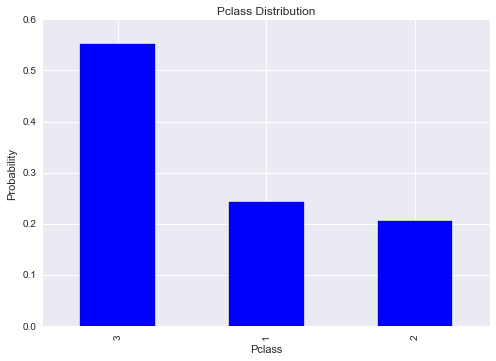

In [29]:
print titanic['Pclass'].describe()
print titanic['Pclass'].value_counts()
plt.figure()
(titanic['Pclass'].value_counts()/titanic['Pclass'].value_counts().sum()).plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Probability')
plt.title('Pclass Distribution')
plt.show()

Around 55% of the passengers belong to Pclass = 3.

### Plotting ##

### Age vs Survival ###

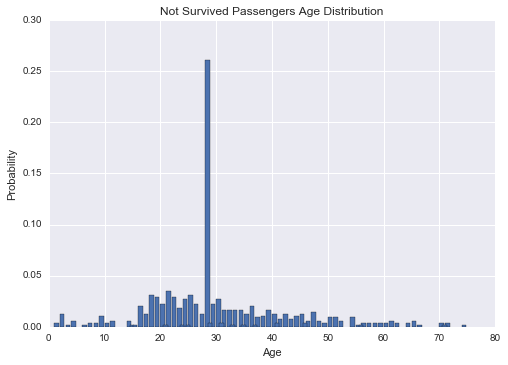

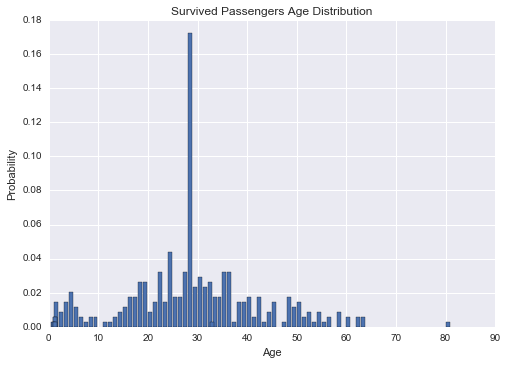

In [16]:
# column - column that should be taken to find the probability
# survived - 1 if the passenger survived otherwise 0
# plot_title - Title of the bar plot

def group_data(column, survived):
    column_list = list(titanic.groupby('Survived')[column].value_counts()[survived].keys())
    total = float(sum(titanic.groupby('Survived')[column].value_counts()[survived].values))
    probability = list(titanic.groupby('Survived')[column].value_counts()[survived].values/total)
    return column_list,probability

def plot_bar(x, y, title, x_label, y_label):
    plt.bar(x, y)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    
survived_ages, probability = group_data('Age', 0)
plot_bar(survived_ages, probability, 'Not Survived Passengers Age Distribution', 'Age', 'Probability')


survived_ages, probability = group_data('Age', 1)
plot_bar(survived_ages, probability, 'Survived Passengers Age Distribution', 'Age', 'Probability')


Even though the probability of not surviving at around age 28 is higher than probability of not surviving at other ages, we can't conclude anything because this is happening to the the fact that we added 28 in place of missing values in **Age** column.

### Sex vs Survival ###

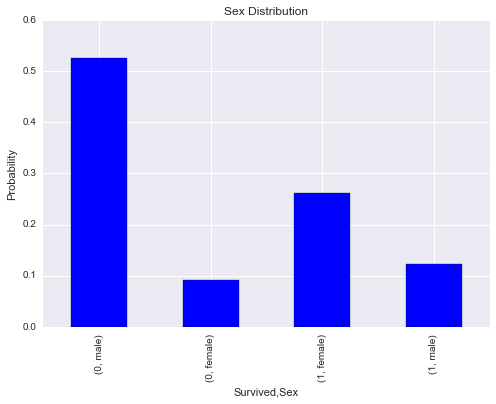

In [17]:
# first group by Survived and then get the sex column
grouped_sex_column = titanic.groupby('Survived')['Sex']
# count the number of values
count = grouped_sex_column.count().sum()
# Plot the probability
plt.figure()
(grouped_sex_column.value_counts()/count).plot(kind='bar', subplots=True)
plt.ylabel('Probability')
plt.title('Sex Distribution')
plt.show()

As you can see here that the probability of survival is high for females. Lets see the correlation between the sex and survived.


In [18]:
titanic.corr()

,Survived,Pclass,Age,SibSp,Parch,Embarked
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.106811
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,0.045702
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,-0.009165
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,-0.059961
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,-0.078665
Embarked,0.106811,0.045702,-0.009165,-0.059961,-0.078665,1.000000


The correlation coeff between **Sex** and **Survived** is `0.543351` which is quite high comparing it with other columns. It is quite possible that females were given priority over males while rescuing.

### Pclass vs Survival ###

Survived  Pclass
0         3         372
          2          97
          1          80
1         1         136
          3         119
          2          87
dtype: int64


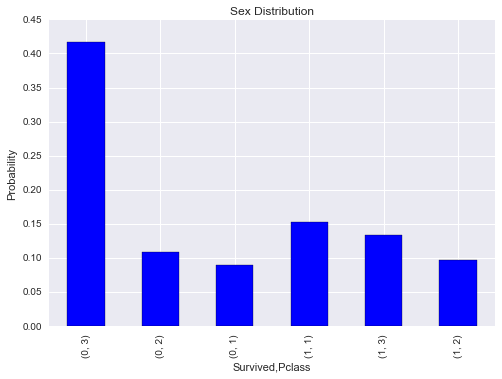

In [24]:
# first group by Survived and then get the Pclass column
grouped_pclass_column = titanic.groupby('Survived')['Pclass']
print grouped_pclass_column.value_counts()
# count the number of values
count = grouped_pclass_column.count().sum()
# Plot the probability
plt.figure()
(grouped_pclass_column.value_counts()/count).plot(kind='bar', subplots=True)
plt.ylabel('Probability')
plt.title('Sex Distribution')
plt.show()

The probability of survival of Pclass 1 passenger is around `.15`. Also probability of survival of Pclass 2 and 3 are `.12` and `.10` respectively. Even though the number of Pclass 3 passengers are very high, the survival probability(`.12`) is almost same with Pclass 1 (`.15`). Here we can infer that higher the Pclass, higher is the probability of survival.
Correlation between the two is `-0.338481`(negative) which also suggests the same.

## Conclusion ##

The high correlation between **Sex** and **Survived** and the higher probability of females Survivors can be seen as the indicator of "preference given to Females over males while rescuing". Also we can see that the Pclass 1 was given preference over other Pclass while rescuing. From this data, we were not able to find any correlation between **Age** and **Survived** because lot of data was missing in it. Even though we filled the missing value with the median, it didn't help as it corrupted the data. Other factors like **SibSp** and **Parch** can also influence the outcome but we haven't analysis their effect.
The other factors like **location of the passenger on the ship at the time of incident ** can also influence the survival rate. It is possible that the state of the person ( drunk or sober ) can also affect its survival.